In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import json

In [3]:
#***************SAN DIEGO***************

In [4]:

# Setting variable API call for San Diego County 
url_SD = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCrashesByLocation?fromCaseYear=2014&toCaseYear=2018&state=6&county=73&format=json"
   

In [5]:
#Pulling data with API, in json format, and check output
url_SD

# Getting json response
response = requests.get(url_SD).json()

# Checking output
response

{'Count': 892,
 'Message': 'Results returned successfully',
 'Results': [[{'CITY': '3260',
    'CITYNAME': 'SAN DIEGO',
    'COUNTY': '73',
    'COUNTYNAME': 'SAN DIEGO (73)',
    'CaseYear': '2014',
    'FATALS': '1',
    'LATITUDE': '32.76605000',
    'LONGITUD': '-117.150869440',
    'STATE': '6',
    'STATENAME': 'California',
    'ST_CASE': '60005',
    'TOTALVEHICLES': '2',
    'TWAY_ID': 'I-8',
    'TWAY_ID2': '',
    'VE_FORMS': '2'},
   {'CITY': '1080',
    'CITYNAME': 'EL CAJON',
    'COUNTY': '73',
    'COUNTYNAME': 'SAN DIEGO (73)',
    'CaseYear': '2014',
    'FATALS': '1',
    'LATITUDE': '32.79522222',
    'LONGITUD': '-116.935727780',
    'STATE': '6',
    'STATENAME': 'California',
    'ST_CASE': '60008',
    'TOTALVEHICLES': '2',
    'TWAY_ID': 'JAMACHA ROAD',
    'TWAY_ID2': '',
    'VE_FORMS': '2'},
   {'CITY': '3260',
    'CITYNAME': 'SAN DIEGO',
    'COUNTY': '73',
    'COUNTYNAME': 'SAN DIEGO (73)',
    'CaseYear': '2015',
    'FATALS': '1',
    'LATITUDE': '32.7

In [6]:
# Validating length of data
RSD=(len(response["Results"][0]))

# Checking output
RSD

892

In [7]:
# Creating empty lists to prepare for dataframe
SD_ST_CASE = []
SD_CaseYear = []
SD_TOTALVEHICLES = []
SD_FATALS = []
SD_LATITUDE =[]
SD_LONGITUD = []
SD_fulldata = []
# Creating for loop to to fill empty lists
for i in range(0,RSD):
    SD_ST_CASE.append(response["Results"][0][i]["ST_CASE"])
    SD_CaseYear.append(response["Results"][0][i]["CaseYear"])
    SD_TOTALVEHICLES.append(response["Results"][0][i]["TOTALVEHICLES"])
    SD_FATALS.append(response["Results"][0][i]["FATALS"])
    SD_LATITUDE.append(response["Results"][0][i]["LATITUDE"])
    SD_LONGITUD.append(response["Results"][0][i]["LONGITUD"])

In [8]:
# Creating dataframe 
SD_stats = pd.DataFrame({'CASEYEAR':SD_CaseYear , 
                         'ST_CASE': SD_ST_CASE ,
                         'TOTALVEHICLES': SD_TOTALVEHICLES , 
                         'FATALS': SD_FATALS , 
                         'LATITUDE': SD_LATITUDE , 
                         'LONGITUD':SD_LONGITUD})

# Checking output
SD_stats.head()

,CASEYEAR,ST_CASE,TOTALVEHICLES,FATALS,LATITUDE,LONGITUD
0,2014,60005,2,1,32.76605000,-117.150869440
1,2014,60008,2,1,32.79522222,-116.935727780
2,2015,60009,1,1,32.74262500,-117.254688890
3,2016,60011,1,1,33.11413056,-117.104897220
4,2016,60014,1,1,32.75183056,-117.014827780


In [9]:
# Sorting the data by year and reset index, check output
SD_grouped=SD_stats.sort_values('CASEYEAR')

# Resetting Index
SD_data=SD_grouped.reset_index(drop=True)

# Converting FATALS from object to integer
SD_data['FATALS']= SD_data['FATALS'].astype(int)

# Checking output
SD_data.head()

,CASEYEAR,ST_CASE,TOTALVEHICLES,FATALS,LATITUDE,LONGITUD
0,2014,60005,2,1,32.76605000,-117.150869440
1,2014,61441,1,1,33.03725833,-116.563241670
2,2014,60543,3,1,32.85119167,-117.115600000
3,2014,61433,2,1,32.69350000,-116.361180560
4,2014,61412,2,2,32.77920278,-116.996597220


In [10]:
# Grouping by year
SD_data_group = SD_data.groupby (['CASEYEAR'])

# Getting number of cases for each year
SD_data_group_ST_CASE = SD_data_group['ST_CASE'].count()

# Checking output
SD_data_group_ST_CASE

CASEYEAR
2014    220
2015    228
2016    229
2017    215
Name: ST_CASE, dtype: int64

In [11]:
# Getting number of fatalities for each year
SD_data_group_FATALS = SD_data_group['FATALS'].sum()

# Checking output
SD_data_group_FATALS

CASEYEAR
2014    233
2015    246
2016    243
2017    231
Name: FATALS, dtype: int64

In [12]:
# Concating data
SD_Acc_df= pd.concat([SD_data_group_ST_CASE,SD_data_group_FATALS],axis=1).reset_index()

# Renaming columns
SD_Acc_df= SD_Acc_df.rename(columns={"CASEYEAR":"Year","ST_CASE": "San Diego Cases", "FATALS": "San Diego Fatalities"})

# Checking output
SD_Acc_df

,Year,San Diego Cases,San Diego Fatalities
0,2014,220,233
1,2015,228,246
2,2016,229,243
3,2017,215,231


In [13]:
#***************TEXAS***************

In [14]:
# Setting variable API call for Dallas County 
url_TX = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCrashesByLocation?fromCaseYear=2014&toCaseYear=2018&state=48&county=113&format=json"
 

In [15]:
# Checking the variable
url_TX

# Getting json response
response = requests.get(url_TX).json()

# Checking output
response

{'Count': 1013,
 'Message': 'Results returned successfully',
 'Results': [[{'CITY': '1730',
    'CITYNAME': 'DALLAS',
    'COUNTY': '113',
    'COUNTYNAME': 'DALLAS (113)',
    'CaseYear': '2014',
    'FATALS': '1',
    'LATITUDE': '32.68372222',
    'LONGITUD': '-96.814405560',
    'STATE': '48',
    'STATENAME': 'Texas',
    'ST_CASE': '480002',
    'TOTALVEHICLES': '1',
    'TWAY_ID': 'SL 12',
    'TWAY_ID2': 'PALODURO LN',
    'VE_FORMS': '1'},
   {'CITY': '1730',
    'CITYNAME': 'DALLAS',
    'COUNTY': '113',
    'COUNTYNAME': 'DALLAS (113)',
    'CaseYear': '2017',
    'FATALS': '1',
    'LATITUDE': '32.69296111',
    'LONGITUD': '-96.845794440',
    'STATE': '48',
    'STATENAME': 'Texas',
    'ST_CASE': '480002',
    'TOTALVEHICLES': '1',
    'TWAY_ID': 'US-67 MARVIN D LOVE FWY',
    'TWAY_ID2': '',
    'VE_FORMS': '1'},
   {'CITY': '2590',
    'CITYNAME': 'GARLAND',
    'COUNTY': '113',
    'COUNTYNAME': 'DALLAS (113)',
    'CaseYear': '2014',
    'FATALS': '2',
    'LATITUDE'

In [16]:
# Checking the length of results data for Dallas
RTX=(len(response["Results"][0]))
RTX

1013

In [17]:
# Creating empty lists
TX_ST_CASE = []
TX_CaseYear = []
TX_TOTALVEHICLES = []
TX_FATALS = []
TX_LATITUDE =[]
TX_LONGITUD = []

# Looping and fill empty lists
for i in range(0,RTX):
    TX_ST_CASE.append(response["Results"][0][i]["ST_CASE"])
    TX_CaseYear.append(response["Results"][0][i]["CaseYear"])
    TX_TOTALVEHICLES.append(response["Results"][0][i]["TOTALVEHICLES"])
    TX_FATALS.append(response["Results"][0][i]["FATALS"])
    TX_LATITUDE.append(response["Results"][0][i]["LATITUDE"])
    TX_LONGITUD.append(response["Results"][0][i]["LONGITUD"])

In [18]:
# Creating DataFrame for Dallas
TX_stats = pd.DataFrame({'CASEYEAR':TX_CaseYear ,
                         'ST_CASE': TX_ST_CASE ,
                         'TOTALVEHICLES': TX_TOTALVEHICLES , 
                         'FATALS': TX_FATALS , 
                         'LATITUDE': TX_LATITUDE , 
                         'LONGITUD':TX_LONGITUD})
# Checking output
TX_stats.head()

,CASEYEAR,ST_CASE,TOTALVEHICLES,FATALS,LATITUDE,LONGITUD
0,2014,480002,1,1,32.68372222,-96.814405560
1,2017,480002,1,1,32.69296111,-96.845794440
2,2014,480003,2,2,32.97686389,-96.665280560
3,2015,480003,1,1,32.67020278,-96.942102780
4,2016,480010,1,1,32.96082222,-96.915183330


In [19]:
# Sorting the values bye year and group the data by year
TX_grouped=TX_stats.sort_values('CASEYEAR')
TX_data=TX_grouped.reset_index(drop=True)

# Changing the Fatals data to an integer so we can sume
TX_data['FATALS']= TX_data['FATALS'].astype(int)

# Checking output
TX_data.head()

,CASEYEAR,ST_CASE,TOTALVEHICLES,FATALS,LATITUDE,LONGITUD
0,2014,480002,1,1,32.68372222,-96.814405560
1,2014,482082,2,1,32.80217778,-97.018566670
2,2014,482068,2,1,32.71139444,-96.908897220
3,2014,482059,1,1,32.76145833,-96.915852780
4,2014,480669,2,1,32.93955278,-96.825408330


In [20]:
# Group by Year
TX_data_group = TX_data.groupby (['CASEYEAR'])

# Get number of cases for each year
TX_data_group_ST_CASE = TX_data_group['ST_CASE'].count()

# Checking output
TX_data_group_ST_CASE

CASEYEAR
2014    222
2015    239
2016    288
2017    264
Name: ST_CASE, dtype: int64

In [21]:
# Summing the number of fatalities for each year
TX_data_group_FATALS = TX_data_group['FATALS'].sum()

# Checking output
TX_data_group_FATALS

CASEYEAR
2014    238
2015    259
2016    315
2017    282
Name: FATALS, dtype: int64

In [22]:
# Concactinating Dallas Cases and Fatalities
TX_Acc_df= pd.concat([TX_data_group_ST_CASE,TX_data_group_FATALS],axis=1).reset_index()

# Renaming columns
TX_Acc_df= TX_Acc_df.rename(columns={"CASEYEAR":"Year","ST_CASE": "Dallas Cases", "FATALS": "Dallas Fatalities"})

# Checking output
TX_Acc_df

,Year,Dallas Cases,Dallas Fatalities
0,2014,222,238
1,2015,239,259
2,2016,288,315
3,2017,264,282


In [23]:
# Merging San Diego and Texas Data
Combined_ACC_df = pd.merge(SD_Acc_df, TX_Acc_df, how='left' , on='Year')

# Checking output
Combined_ACC_df

,Year,San Diego Cases,San Diego Fatalities,Dallas Cases,Dallas Fatalities
0,2014,220,233,222,238
1,2015,228,246,239,259
2,2016,229,243,288,315
3,2017,215,231,264,282


In [24]:
#Validating the information
Combined_ACC_df.count()


Year                    4
San Diego Cases         4
San Diego Fatalities    4
Dallas Cases            4
Dallas Fatalities       4
dtype: int64

In [31]:
# Making a DataFrame to plot data for graph
raw_data = {'years': ['2014', '2015', '2016', '2017'],
        'sdcase': [220, 228, 229, 215],
        'txcase': [222, 239, 288, 264],
        'sdfatal': [233, 246, 243, 231],
        'txfatal': [238, 259, 315, 282]}
df = pd.DataFrame(raw_data, columns = ['years', 'sdcase', 'txcase', 'sdfatal', 'txfatal'])

# Checking output
df

,years,sdcase,txcase,sdfatal,txfatal
0,2014,220,222,233,238
1,2015,228,239,246,259
2,2016,229,288,243,315
3,2017,215,264,231,282


<IPython.core.display.Javascript object>


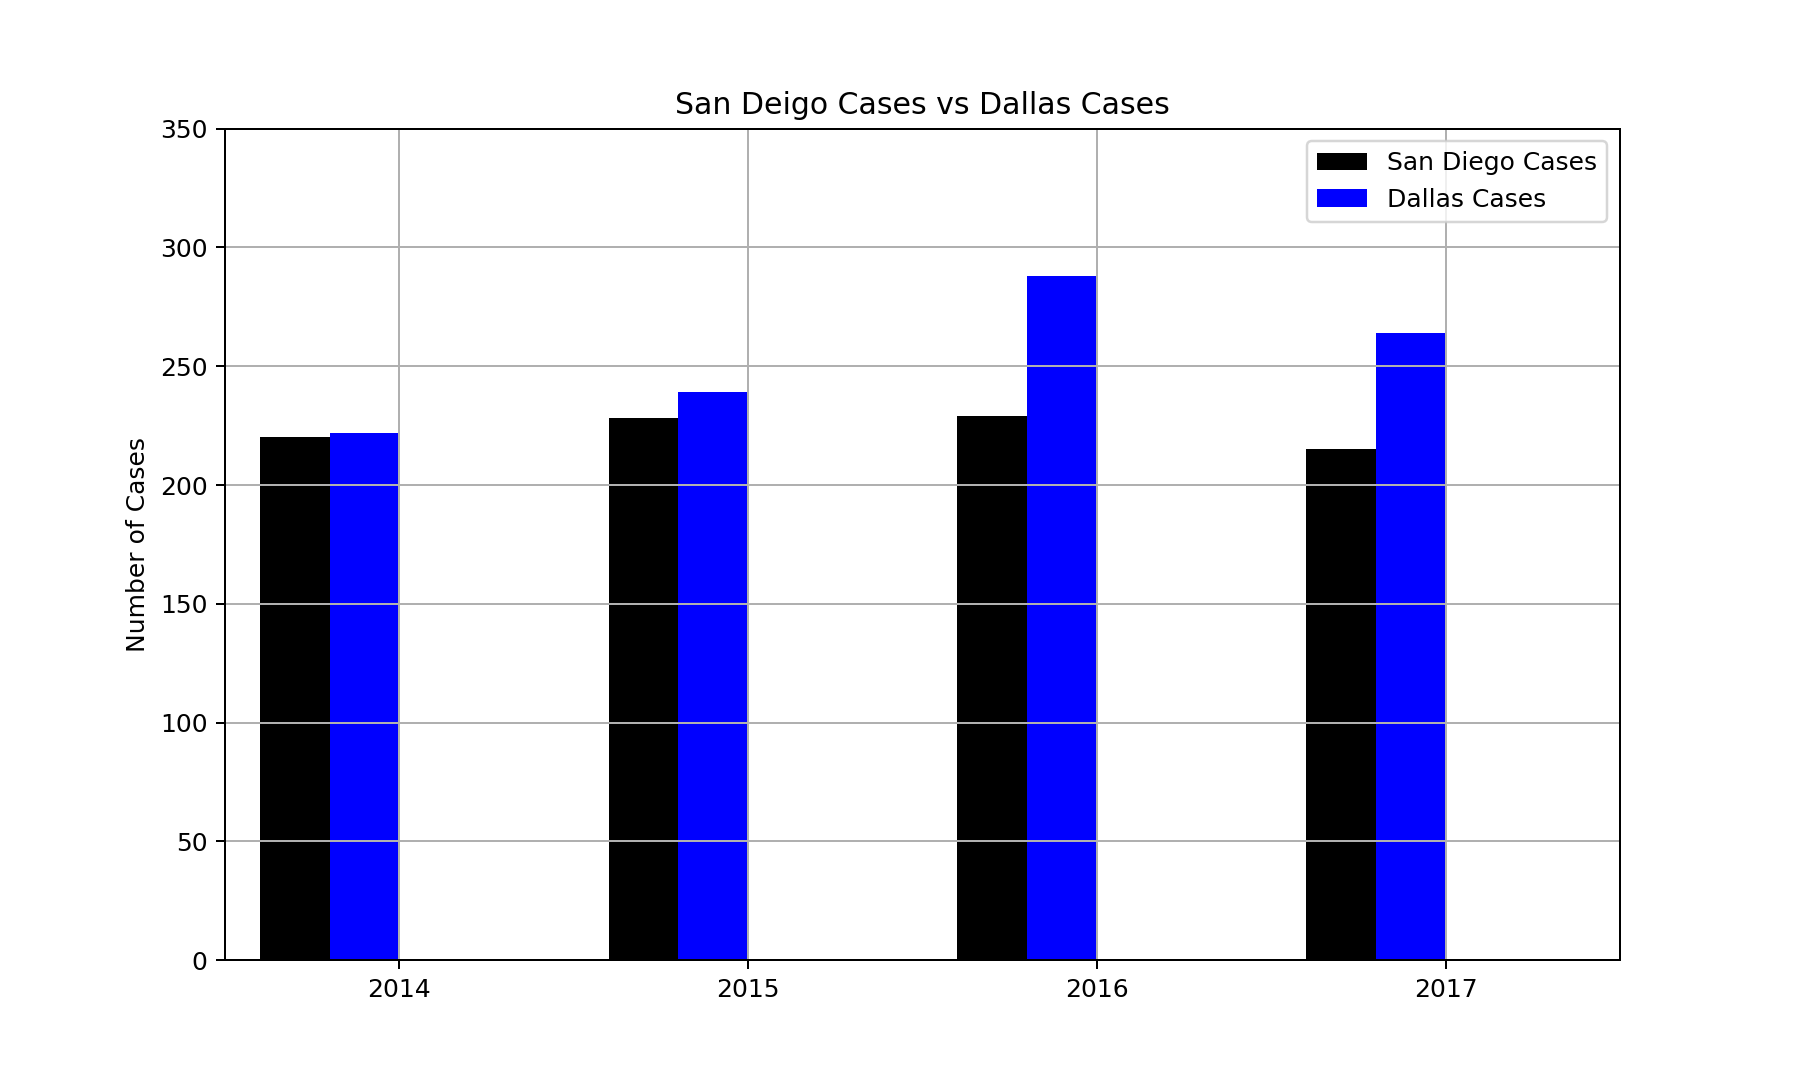

In [33]:
# Setting the positions, colors and width for the bars
pos = list(range(len(df['sdcase']))) 
width = 0.20 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,6))

# Create a bar with sdcase data,
# in position pos,
plt.bar(pos, 
        #using df['sdcase'] data,
        df['sdcase'], 
        # of width
        width,  
        # with color
        color='black', 
        # with label the first value in years
        label=df['years'][0]) 

# Create a bar with txcase data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['txcase'] data,
        df['txcase'],
        # of width
        width,  
        # with color
        color='blue', 
        # with label the second value in first_name
        label=df['years'][1]) 


# Set the y axis label
ax.set_ylabel('Number of Cases')

# Set the chart's title
ax.set_title('San Deigo Cases vs Dallas Cases')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['years'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,350])

# Adding the legend and showing the plot
plt.legend(['San Diego Cases', 'Dallas Cases'], loc='upper right')
plt.grid()
plt.savefig('Cases.png')
plt.show()

<IPython.core.display.Javascript object>


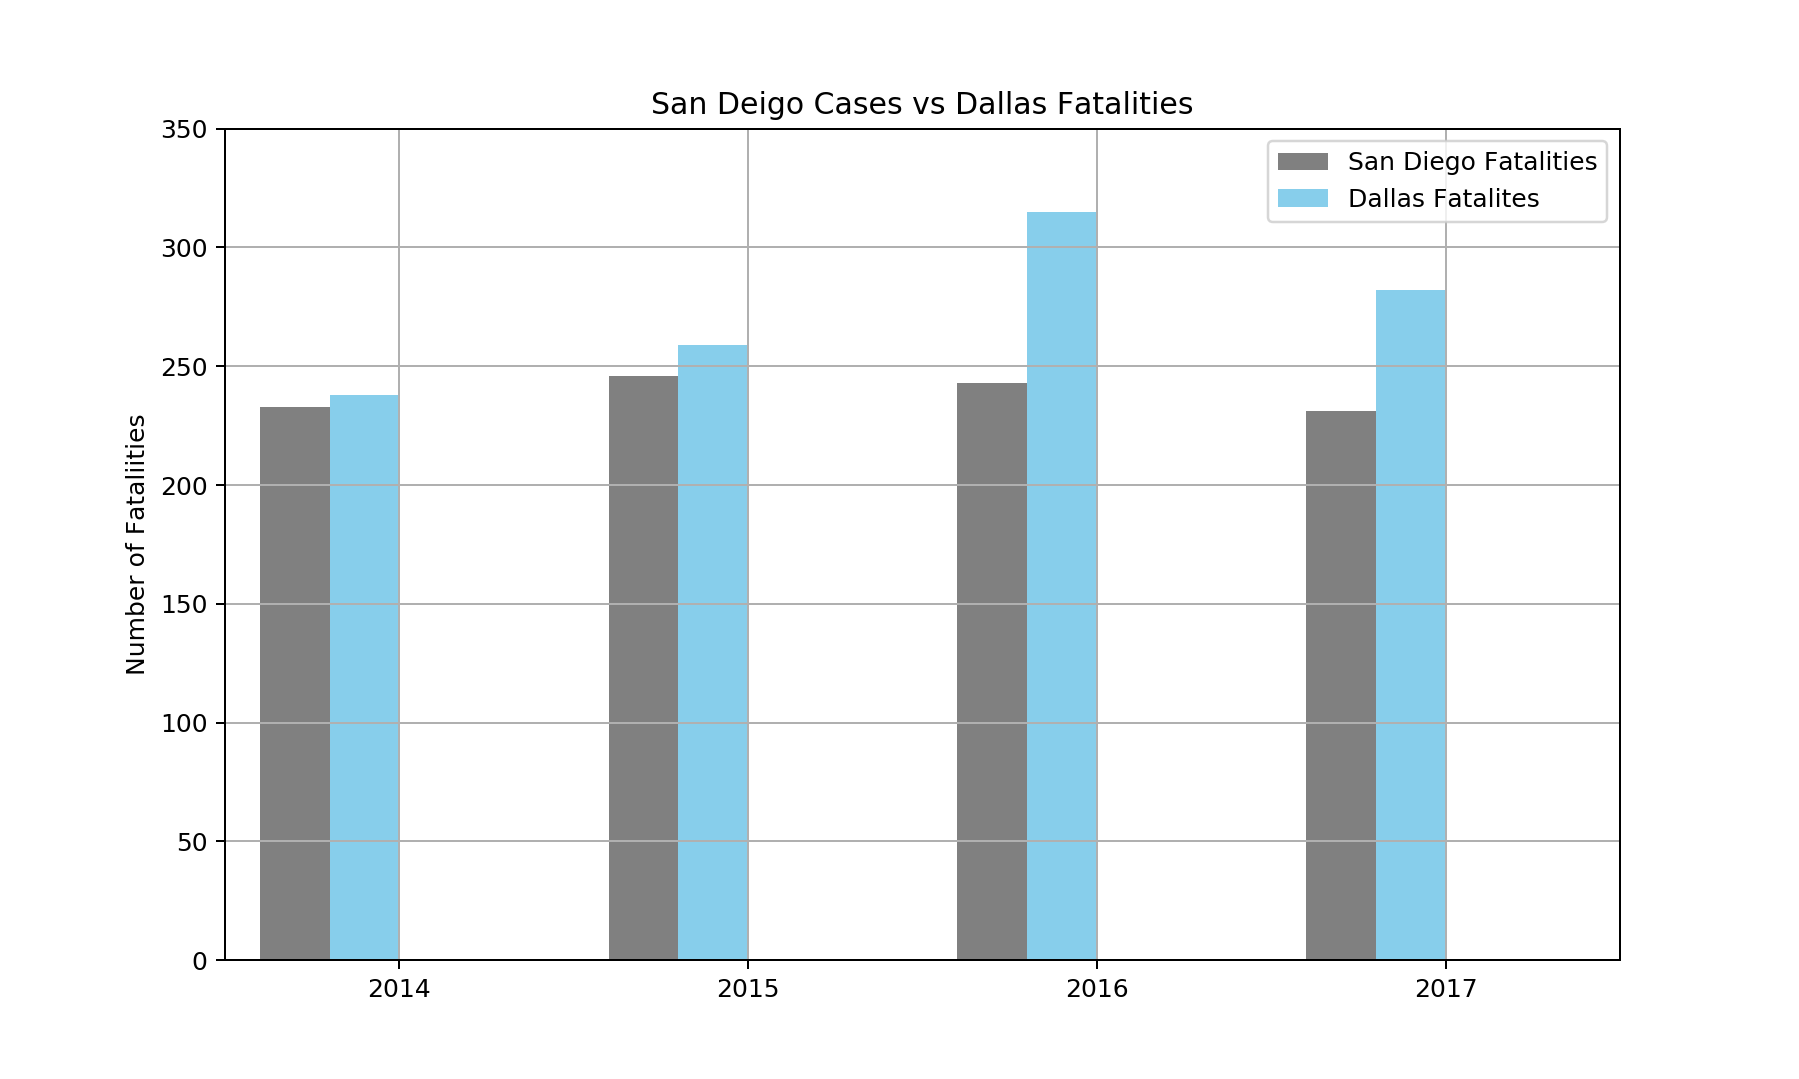

In [36]:
# Setting the positions, colors and width for the bars
pos = list(range(len(df['sdcase']))) 
width = 0.20 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,6))

# Create a bar with sdcase data,
# in position pos,
plt.bar(pos, 
        #using df['sdcase'] data,
        df['sdfatal'], 
        # of width
        width,  
        # with color
        color='grey', 
        # with label the first value in years
        label=df['years'][0]) 

# Create a bar with txcase data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['txcase'] data,
        df['txfatal'],
        # of width
        width,  
        # with color
        color='skyblue', 
        # with label the second value in first_name
        label=df['years'][1]) 


# Set the y axis label
ax.set_ylabel('Number of Fataliities')

# Set the chart's title
ax.set_title('San Deigo Cases vs Dallas Fatalities')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['years'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,350])

# Adding the legend and showing the plot
plt.legend(['San Diego Fatalities', 'Dallas Fatalites'], loc='upper right')
plt.grid()
plt.savefig('Fatal.png')
plt.show()

<IPython.core.display.Javascript object>


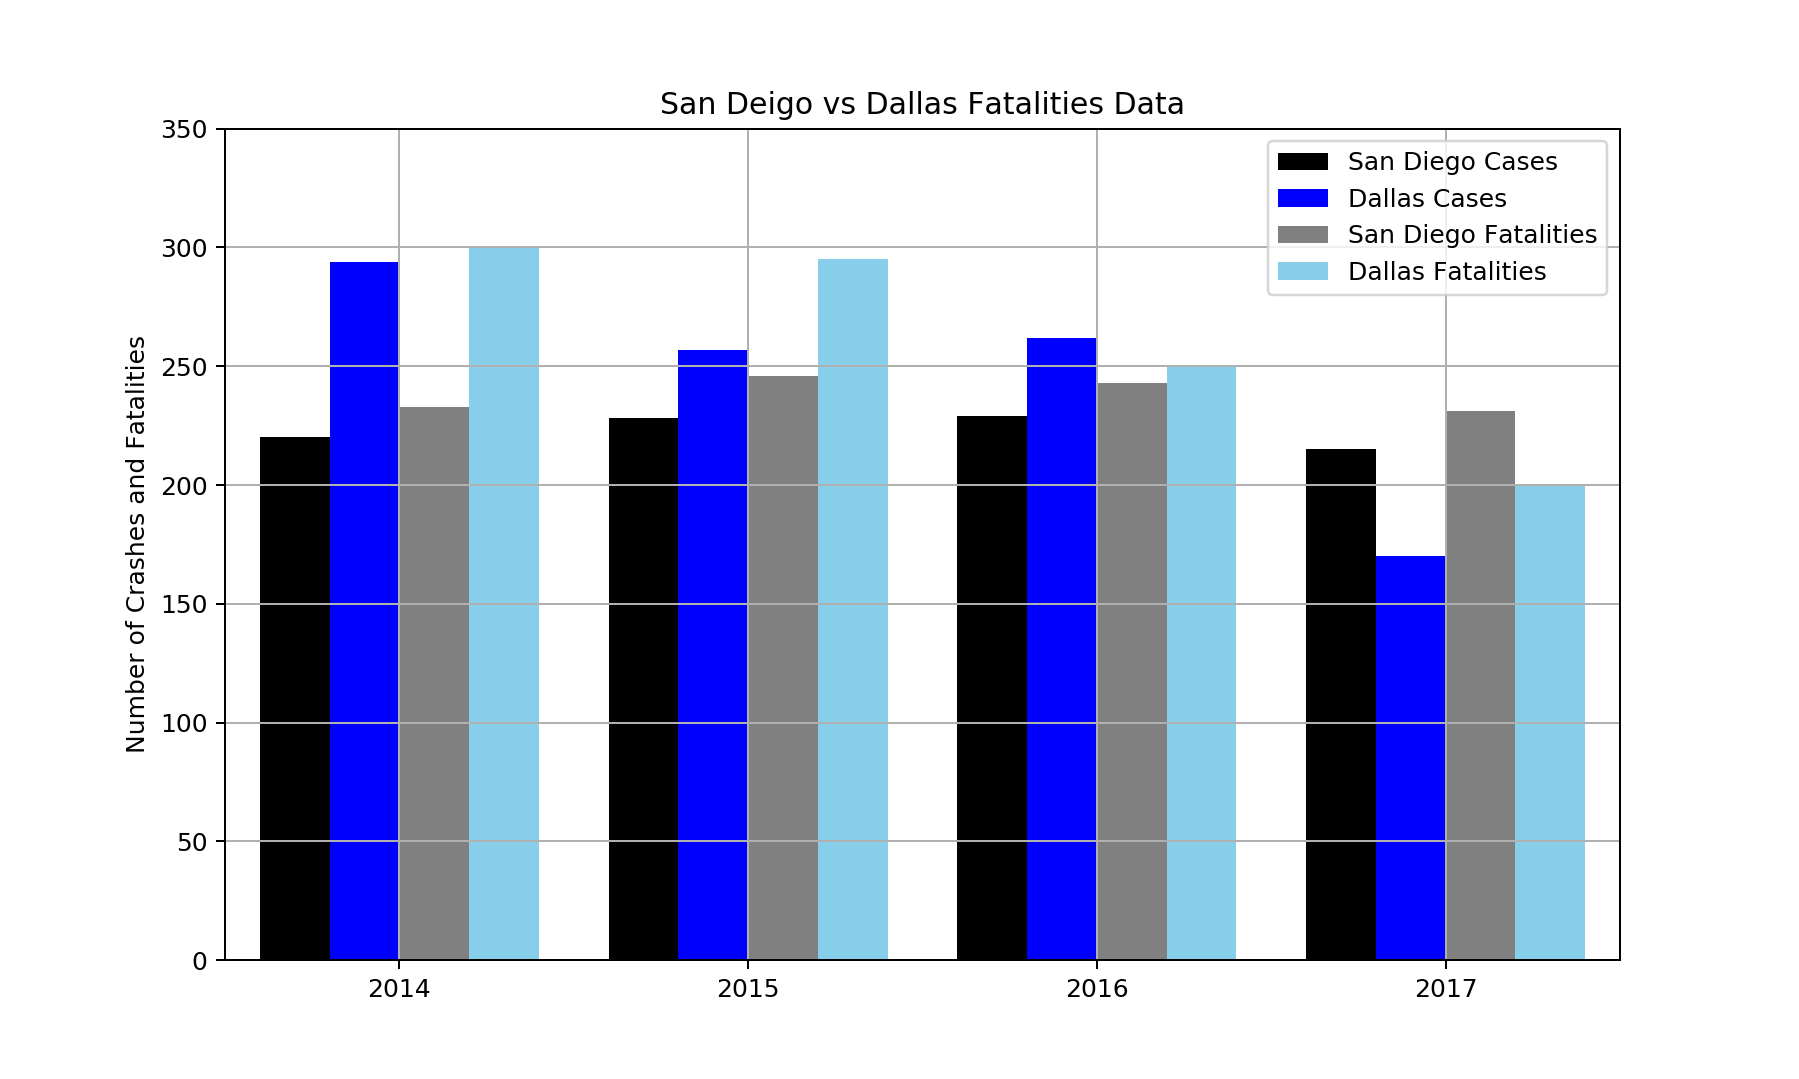

In [78]:
# Setting the positions, colors and width for the bars
pos = list(range(len(df['sdcase']))) 
width = 0.20 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,6))

# Create a bar with sdcase data,
# in position pos,
plt.bar(pos, 
        #using df['sdcase'] data,
        df['sdcase'], 
        # of width
        width,  
        # with color
        color='black', 
        # with label the first value in years
        label=df['years'][0]) 

# Create a bar with txcase data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['txcase'] data,
        df['txcase'],
        # of width
        width,  
        # with color
        color='blue', 
        # with label the second value in first_name
        label=df['years'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['sdfatal'] data,
        df['sdfatal'], 
        # of width
        width, 
        # with color
        color='grey', 
        # with label the third value in years
        label=df['years'][2]) 
# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using df['yxfatal'] data,
        df['txfatal'], 
        # of width
        width, 
        # with color
        color='skyblue', 
        # with label the third value in years
        label=df['years'][3]) 


# Set the y axis label
ax.set_ylabel('Number of Crashes and Fatalities')

# Set the chart's title
ax.set_title('San Deigo vs Dallas Fatalities Data')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['years'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,350])

# Adding the legend and showing the plot
plt.legend(['San Diego Cases', 'Dallas Cases', 'San Diego Fatalities', 'Dallas Fatalities'], loc='upper right')
plt.grid()
plt.savefig('Cases and Fatalities.png')
plt.show()

### The  above analysis shows a down tren in cases ofr Dallas but a even trend for San Diego

